In [ ]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''ライブラリの準備'''
import pickle
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [ ]:
with open('/content/drive/MyDrive/Bachelor_thisis/dataset/pic.bin', 'rb') as p:
    data = pickle.load(p)

train = data[0]
test = data[1]

train_set = train[0]
train_eval = train[1]

test_set = test[0]
test_eval = test[1]

In [ ]:
# 使用するDeviceの指定
# GPUが使用できる方はGPU, 使用できない方はCPUを使用するように設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Tensorに変換
x_train = torch.Tensor(train_set)
y_train = torch.Tensor(train_eval)
x_test = torch.Tensor(test_set)
y_test = torch.Tensor(test_eval)
# データセッを作成
ds_train = TensorDataset(x_train, y_train)
# DataLoaderを作成
train_loader = DataLoader(ds_train, batch_size=1, shuffle=True)

In [ ]:
'''モデルの定義'''
class Net(nn.Module):
    def __init__(self, n_vis=26, n_hid=512, n_out=81, device='cpu'):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_vis, n_hid)
        self.fc2 = nn.Linear(n_hid, n_out)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x
net = Net()

In [ ]:
## call model

model_path = '/content/drive/MyDrive/Bachelor_thisis/NN/nn4_apply.pt'
net = torch.load(model_path)

In [ ]:
net = net.eval()

In [ ]:
pred = net(x_test)

In [ ]:
max_diff_list = []
gen_ind_list = []

In [ ]:
for i in range(len(y_test)):
    teach_data = y_test[i].detach().cpu().numpy()
    pred_data = pred[i].detach().cpu().numpy()

    min_elem = np.min(np.where(teach_data > 0, teach_data, 2))
    judge = round(min_elem / 2, 5)
    data_diff = np.round(np.abs(teach_data - pred_data), 2)

    max_diff = np.max(data_diff)
    max_diff_list.append(max_diff)

    gen_ind = np.count_nonzero(data_diff >= judge)
    gen_ind_list.append(gen_ind)

In [ ]:
gen_ind_array = np.array(gen_ind_list)
gen_ind_mean = np.mean(gen_ind_array)

print('gen_ind_mean = ', gen_ind_mean)

gen_ind_mean =  0.6759259259259259


In [ ]:
max_diff_array = np.array(max_diff_list)
total_max_diff = np.max(max_diff_array)
max_idx = np.argmax(max_diff_array)

print('total_max_diff = ', total_max_diff)
print('max_idx = ', max_idx)

total_max_diff =  0.12
max_idx =  91


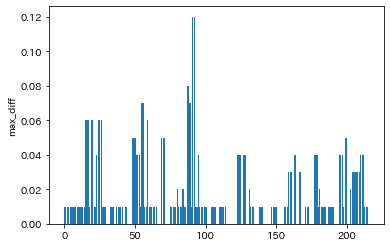

In [ ]:
x = np.arange(0, len(max_diff_array))
y = max_diff_array

plt.ylabel("max_diff")

plt.bar(x, y)
plt.show()

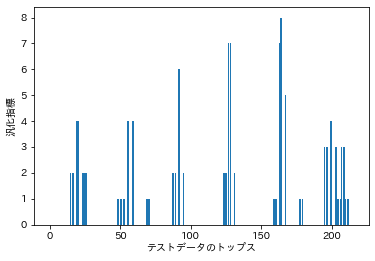

In [ ]:
x2 = np.arange(0, len(gen_ind_array))
y2 =gen_ind_array

plt.xlabel("テストデータのトップス")
plt.ylabel("汎化指標")

plt.bar(x2, y2)
plt.show()

In [ ]:
len(gen_ind_array)

216

In [ ]:
re_gen_ind = np.reshape(gen_ind_array, (72, 3))
re_gen_ind

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [0, 4, 4],
       [0, 0, 2],
       [2, 2, 2],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 4, 4],
       [0, 0, 4],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [0, 6, 6],
       [0, 0, 2],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [0, 7, 7],
       [0, 0, 2],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 7, 8],
       [0,

In [ ]:
re_gen_ind[0:12]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [0, 4, 4],
       [0, 0, 2],
       [2, 2, 2],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
re_gen_ind[12:24]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 4, 4],
       [0, 0, 4],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1]])

In [ ]:
re_gen_ind[24:36]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [0, 6, 6],
       [0, 0, 2],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
re_gen_ind[36:48]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [0, 7, 7],
       [0, 0, 2],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
re_gen_ind[48:60]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 7, 8],
       [0, 0, 5],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1]])

In [ ]:
re_gen_ind[60:72]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [3, 3, 3],
       [0, 4, 4],
       [0, 0, 3],
       [1, 1, 1],
       [3, 3, 3],
       [1, 1, 1],
       [0, 0, 0]])

In [ ]:
teach_data = y_test[max_idx].detach().cpu().numpy()
pred_data = pred[max_idx].detach().cpu().numpy()

In [ ]:
x1_axis = [i for i in range(len(y_train[0]+1))]
x2_axis = [i+0.5 for i in range(len(pred[0] + 1))]

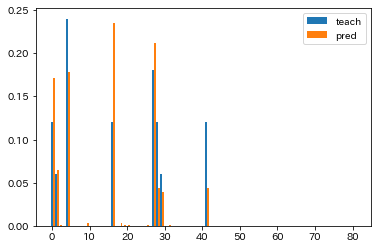

In [ ]:
plt.bar(x1_axis, teach_data, width=0.5, label='teach')
plt.bar(x2_axis, pred_data, width=0.5, label='pred')

plt.legend()
plt.show()